# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
	X_train.append(training_set_scaled[i - 60:i, 0])
	y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


### Reshaping

In [5]:
print(X_train.shape[0])
print(X_train.shape[1])
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

1198
60


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

2022-04-15 16:30:32.093442: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 47ms/step - loss: 0.0349
Epoch 2/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0037
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
	X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[765.3599 ]
 [762.6122 ]
 [762.66327]
 [763.9471 ]
 [767.2203 ]
 [773.07935]
 [778.656  ]
 [781.2166 ]
 [781.8031 ]
 [781.6039 ]
 [781.2545 ]
 [780.8387 ]
 [780.5025 ]
 [780.8785 ]
 [781.7411 ]
 [786.17206]
 [793.03546]
 [800.5894 ]
 [804.9651 ]
 [801.33014]]


### Visualising the results

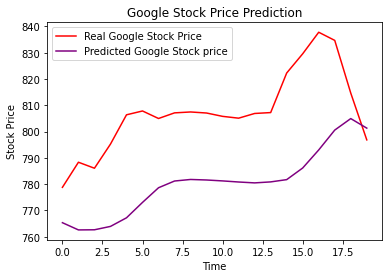

In [17]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='purple', label='Predicted Google Stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()